In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_csv('amazon_alexa.csv')
print(f"Dataset shape : {data.shape}")

Dataset shape : (3150, 5)


In [8]:
data

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [10]:
data.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [11]:
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [12]:
data.columns

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [13]:
rating = data['rating'].value_counts()
rating

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64

In [14]:
data['feedback'].value_counts()

1    2893
0     257
Name: feedback, dtype: int64

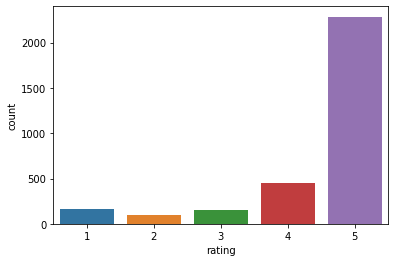

In [15]:
#Now let's see some visuals
sns.countplot(x=data['rating'])
plt.show()

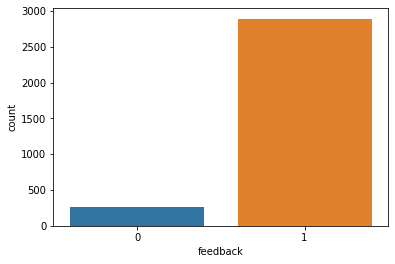

In [16]:
sns.countplot(x=data['feedback'])
plt.show()

In [17]:
# HOW MANY ALEXA PRODUCTS ARE THERE?
data['variation'].nunique()

16

In [18]:
# HOW MANY COMMENTS HAVE BEEN MADE ABOUT WHICH PRODUCT? 
data['variation'].value_counts()

Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64

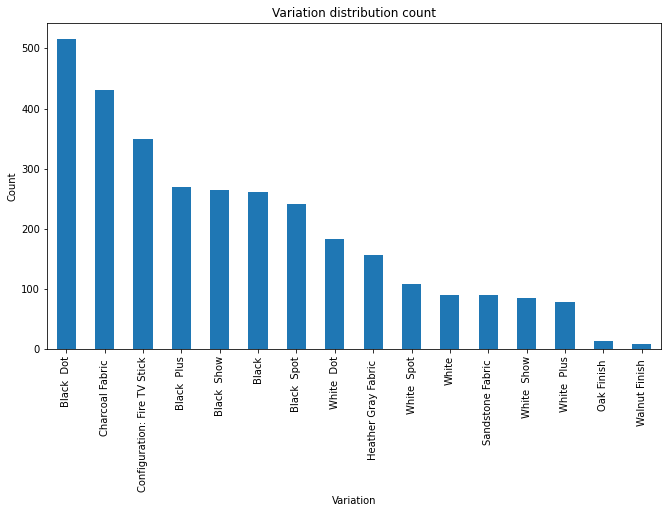

In [19]:
#Bar graph to visualize the total counts of each variation

data['variation'].value_counts().plot.bar(figsize=(11, 6))
plt.title('Variation distribution count')
plt.xlabel('Variation')
plt.ylabel('Count')
plt.show()

In [20]:
#Finding the percentage distribution of each variation - we'll divide the number of records for each variation by total number of records

print(f"Variation value count - percentage distribution: \n{round(data['variation'].value_counts()/data.shape[0]*100,2)}")

Variation value count - percentage distribution: 
Black  Dot                      16.38
Charcoal Fabric                 13.65
Configuration: Fire TV Stick    11.11
Black  Plus                      8.57
Black  Show                      8.41
Black                            8.29
Black  Spot                      7.65
White  Dot                       5.84
Heather Gray Fabric              4.98
White  Spot                      3.46
White                            2.89
Sandstone Fabric                 2.86
White  Show                      2.70
White  Plus                      2.48
Oak Finish                       0.44
Walnut Finish                    0.29
Name: variation, dtype: float64


In [21]:
#Mean Rating according to variation
data.groupby('variation')['rating'].mean()


variation
Black                           4.233716
Black  Dot                      4.453488
Black  Plus                     4.370370
Black  Show                     4.490566
Black  Spot                     4.311203
Charcoal Fabric                 4.730233
Configuration: Fire TV Stick    4.591429
Heather Gray Fabric             4.694268
Oak Finish                      4.857143
Sandstone Fabric                4.355556
Walnut Finish                   4.888889
White                           4.142857
White  Dot                      4.423913
White  Plus                     4.358974
White  Show                     4.282353
White  Spot                     4.311927
Name: rating, dtype: float64

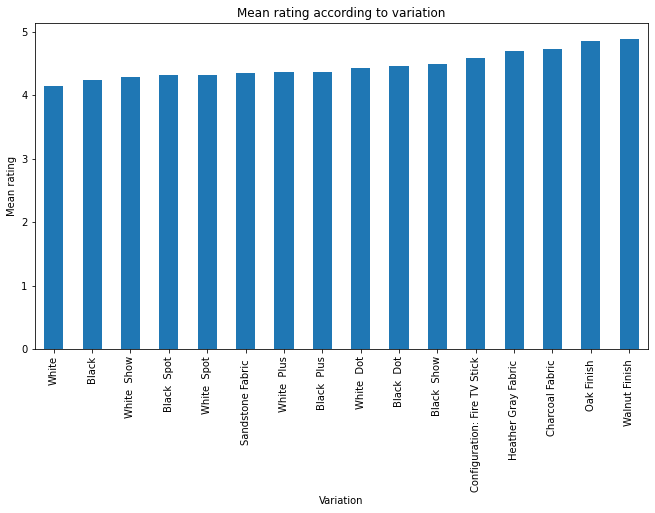

In [22]:
data.groupby('variation')['rating'].mean().sort_values().plot.bar(figsize=(11, 6))
plt.title("Mean rating according to variation")
plt.xlabel('Variation')
plt.ylabel('Mean rating')
plt.show()

# Sentiment analysis

In [23]:
import nltk
import string
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from autocorrect import Speller
import emoji


In [24]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [25]:

def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove punctuation marks
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenize the text
    tokens = word_tokenize(text.lower())

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token, pos='v') for token in filtered_tokens]

    # Correct spelling
    spell = Speller(lang='en')
    corrected_tokens = [spell(token) for token in lemmatized_tokens]

    # Convert emojis
    converted_tokens = [emoji.demojize(token) for token in corrected_tokens]

    # Join the tokens back into a string
    processed_text = ' '.join(converted_tokens)
    return processed_text


In [26]:
# apply the function data
data['verified_reviews'] = data['verified_reviews'].apply(preprocess_text)
data

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,love echo,1
1,5,31-Jul-18,Charcoal Fabric,love,1
2,4,31-Jul-18,Walnut Finish,sometimes play game answer question correctly ...,1
3,5,31-Jul-18,Charcoal Fabric,lot fun thing yr old learn dinosaurs control l...,1
4,5,31-Jul-18,Charcoal Fabric,music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,perfect kid adults everyone,1
3146,5,30-Jul-18,Black Dot,listen music search locations check time look ...,1
3147,5,30-Jul-18,Black Dot,love things run entire home tv light thermosta...,1
3148,5,30-Jul-18,White Dot,complaint sound quality isnt great mostly use ...,1


###  Rule based approach using VADER

In [27]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# initialize NLTK sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [28]:
# Define a function to get sentiment scores and labels for each text
#We use the compound score from VADER, which represents an overall sentiment ranging from -1 (most negative) to 1 (most positive).
#If the compound score is greater than or equal to 0.05, we classify the sentiment as 'positive'.
#If the compound score is less than or equal to -0.05, we classify the sentiment as 'negative'.
#If the compound score is between -0.05 and 0.05, we classify the sentiment as 'neutral'.
# create get_sentiment function
def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    return {
        'positive': scores['pos'],
        'negative': scores['neg'],
        'neutral': scores['neu'],
        'compound': scores['compound'],
        'sentiment': classify_sentiment(scores['compound'])
    }

# Define a function to classify sentiment based on compound score thresholds
def classify_sentiment(compound_score):
    if compound_score >= 0.05:
        return 'positive'
    elif compound_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'




In [29]:
# Apply get_sentiment function to the text column
sentiment_df = data['verified_reviews'].apply(get_sentiment).apply(pd.Series)

# Concatenate the sentiment DataFrame with the original DataFrame
df = pd.concat([data, sentiment_df], axis=1)
df

,rating,date,variation,verified_reviews,feedback,positive,negative,neutral,compound,sentiment
0,5,31-Jul-18,Charcoal Fabric,love echo,1,0.808,0.000,0.192,0.6369,positive
1,5,31-Jul-18,Charcoal Fabric,love,1,1.000,0.000,0.000,0.6369,positive
2,4,31-Jul-18,Walnut Finish,sometimes play game answer question correctly ...,1,0.223,0.141,0.636,0.2023,positive
3,5,31-Jul-18,Charcoal Fabric,lot fun thing yr old learn dinosaurs control l...,1,0.564,0.000,0.436,0.9260,positive
4,5,31-Jul-18,Charcoal Fabric,music,1,0.000,0.000,1.000,0.0000,neutral
...,...,...,...,...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,perfect kid adults everyone,1,0.552,0.000,0.448,0.5719,positive
3146,5,30-Jul-18,Black Dot,listen music search locations check time look ...,1,0.000,0.000,1.000,0.0000,neutral
3147,5,30-Jul-18,Black Dot,love things run entire home tv light thermosta...,1,0.378,0.072,0.550,0.9468,positive
3148,5,30-Jul-18,White Dot,complaint sound quality isnt great mostly use ...,1,0.228,0.161,0.611,0.5116,positive


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['variation'], df['sentiment'], test_size=0.2, random_state=42)

# Define a pipeline combining a text feature extractor with a classifier
model = make_pipeline(CountVectorizer(), MultinomialNB())

# Train the model
model.fit(X_train, y_train)

# Predict the sentiment on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Now you can use the trained model to predict sentiment for new variations
new_variation = ["Charcoal Fabric", "Walnut Finish", "Black Dot"]
predicted_sentiments = model.predict(new_variation)

# Print custom messages based on predicted sentiments
for variation, sentiment in zip(new_variation, predicted_sentiments):
    if sentiment == 'positive':
        print(f"The variation '{variation}' is a good product!")
    elif sentiment == 'negative':
        print(f"The variation '{variation}' is not recommended.")

Accuracy: 0.8269841269841269
The variation 'Charcoal Fabric' is a good product!
The variation 'Walnut Finish' is a good product!
The variation 'Black Dot' is a good product!


In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['variation'], df['sentiment'], test_size=0.2, random_state=42)

# Define a pipeline combining a text feature extractor with a classifier
model = make_pipeline(CountVectorizer(), SVC(kernel='linear'))

# Train the model
model.fit(X_train, y_train)

# Predict the sentiment on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Now you can use the trained model to predict sentiment for new variations
new_variation = ["Charcoal Fabric", "Walnut Finish", "Black Dot"]
predicted_sentiments = model.predict(new_variation)

# Print custom messages based on predicted sentiments
for variation, sentiment in zip(new_variation, predicted_sentiments):
    if sentiment == 'positive':
        print(f"The variation '{variation}' is a good product!")
    elif sentiment == 'negative':
        print(f"The variation '{variation}' is not recommended.")


Accuracy: 0.8269841269841269
The variation 'Charcoal Fabric' is a good product!
The variation 'Walnut Finish' is a good product!
The variation 'Black Dot' is a good product!


In [32]:
import pickle

# Save the model
pickle.dump(model, open("model.pkl", "wb"))